# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [90]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns

housing = pd.read_csv("boston_data.csv")
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

(404, 14)
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64
crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object


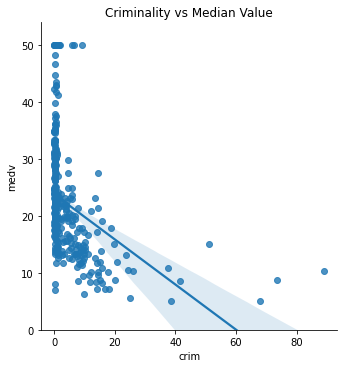

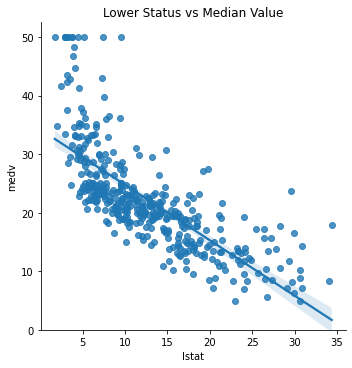

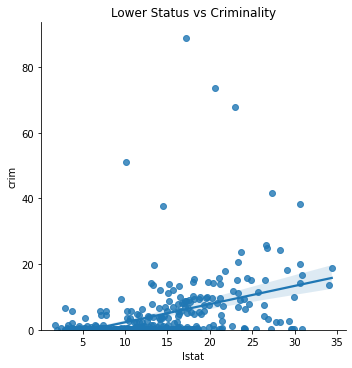

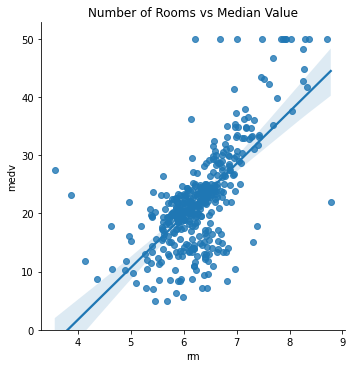

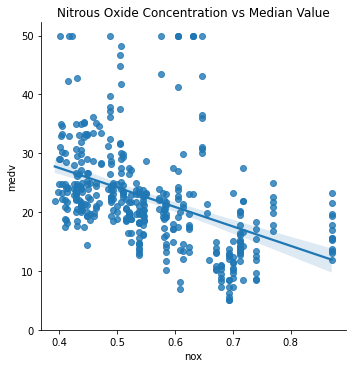

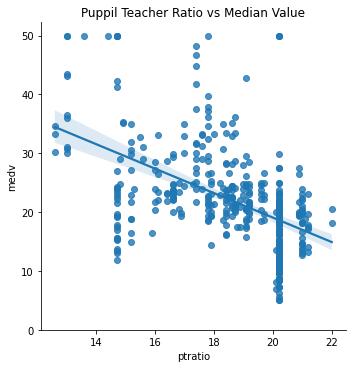

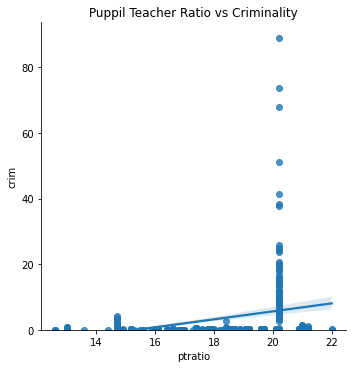

In [62]:
# Your plots here
print(housing.shape)
print(housing.isna().sum())
print(housing.dtypes)

sns.lmplot(data = housing, x="crim",y="medv").set(ylim=(0)).set(title='Criminality vs Median Value')
sns.lmplot(data = housing, x="lstat",y="medv").set(ylim=(0)).set(title='Lower Status vs Median Value')
sns.lmplot(data = housing, x="lstat",y="crim").set(ylim=(0)).set(title='Lower Status vs Criminality')
sns.lmplot(data = housing, x="rm",y="medv").set(ylim=(0)).set(title='Number of Rooms vs Median Value')
sns.lmplot(data = housing, x="nox",y="medv").set(ylim=(0)).set(title='Nitrous Oxide Concentration vs Median Value')
sns.lmplot(data = housing, x="ptratio",y="medv").set(ylim=(0)).set(title='Puppil Teacher Ratio vs Median Value')
sns.lmplot(data = housing, x="ptratio",y="crim").set(ylim=(0)).set(title='Puppil Teacher Ratio vs Criminality')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [63]:
# Your response here
# Bigger houses, more teachers, less criminality, less contamination, higher status  = bigger value
# the last one gives me a hint, that maybe there's an unique neigbourhood with the highest criminality and only one school serving there.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

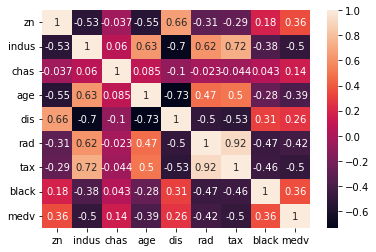

In [64]:
# Your response here
columns =["zn","indus","chas","age","dis","rad","tax","black", "medv"]

sns.heatmap(housing[columns].corr(),annot=True)

#chas and black doesn't seem to have a big correlation with the other, neither positive nor negative
housing.drop("chas", axis=1, inplace= True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [65]:
# Your code here
housing.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [66]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true,y_predict)



### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [67]:
# Your code here
from sklearn.model_selection import train_test_split

X = housing.drop("medv", axis=1)
y = housing["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7,train_size=0.8)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [80]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor

max_depth = [2,4,6,8,10]
test_scores = []
train_scores = []

for trees in max_depth:

    forest = RandomForestRegressor(max_depth=trees) 
    forest.fit(X_train, y_train)
    
    print(trees, "trees test: ", forest.score(X_test,y_test))
    test_scores.append((forest.score(X_test,y_test)*100))
    print(trees, "trees train: ", forest.score(X_train,y_train))
    train_scores.append((forest.score(X_train,y_train)*100))



2 trees test:  0.7202123981598716
2 trees train:  0.7725575695855581
4 trees test:  0.8584806939393201
4 trees train:  0.9107236716297038
6 trees test:  0.8731592323674687
6 trees train:  0.9547963677812257
8 trees test:  0.878889576758396
8 trees train:  0.9703471468868199
10 trees test:  0.8798262201695648
10 trees train:  0.9738554488274733


Now, plot the score for each tree on the training set and on the testing set.

C:\Users\jadca\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jadca\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

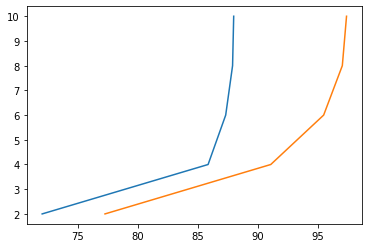

In [81]:
# Produce a plot with the score for the testing and training for the different max depths
sns.lineplot(test_scores, max_depth)
sns.lineplot(train_scores, max_depth)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# Until a certain degree, more depth means better performance.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
# a low depth means that not every detail of the data will be taken into account, creating underfitting, because of high bias.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [89]:
# Your response here
import time
max_depth = [1,2,3,4,5,6,7,8,10,12,14,16,18,20,22,100]
test_scores = []
train_scores = []

for trees in max_depth:
    start = time.time()
    forest = RandomForestRegressor(max_depth=trees) 
    forest.fit(X_train, y_train)
    
    print(trees, "trees test: ", forest.score(X_test,y_test))
    test_scores.append((forest.score(X_test,y_test)*100))
    print(trees, "trees train: ", forest.score(X_train,y_train))
    train_scores.append((forest.score(X_train,y_train)*100))
    end = time.time()
    print(end - start,  "seconds")
    
# after 8-10 degrees of depth, the performance doesn't get better, and also, in this case the execution time isn't better. 

1 trees test:  0.5783929074158775
1 trees train:  0.5624280764826524
0.2652418613433838 seconds
2 trees test:  0.726383176454442
2 trees train:  0.7739354653812531
0.289259672164917 seconds
3 trees test:  0.819402347392314
3 trees train:  0.8632726729963699
0.30828189849853516 seconds
4 trees test:  0.8596253380554311
4 trees train:  0.9122751285262698
0.3142819404602051 seconds
5 trees test:  0.8637541060114533
5 trees train:  0.9377153923576476
0.337308406829834 seconds
6 trees test:  0.8733462714253069
6 trees train:  0.9526722184620886
0.3463125228881836 seconds
7 trees test:  0.8713921965229967
7 trees train:  0.9649761631439346
0.3803441524505615 seconds
8 trees test:  0.8817888959205686
8 trees train:  0.9708915963176182
0.39137959480285645 seconds
10 trees test:  0.8821032156512709
10 trees train:  0.9757455050472513
0.4153764247894287 seconds
12 trees test:  0.8828806529528835
12 trees train:  0.9765583619835163
0.46942782402038574 seconds
14 trees test:  0.8762918353027984
14

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
# 1.- The data collected in 1978 can be useful if they measured the same values as we need and measure today. It can be used to see demographic movements, the decline or rise of rich/poor neighbourhoods and try to analyse why. Historical data is under my eyes really important.
# 2.- Could be: and old house in a rich neighbourhood with a high tax value is surely a nicely maintained house with its old charm.
# 3.- I think so.
# 4.- Can be useful for a little growing city, to avoid problems while growing or to make better plans.